### Linear Regression and Train/Test Split challenges

### Ideally, try these with your own movie data! (Alternatively, there is the 2013_movies.csv data set.)

Challenge 1:
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

Challenge 2:
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

Challenge 3:
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

Challenge 4:
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

Challenge 5:
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [14]:
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
import pandas as pd
import pickle
with open("final_dataframe_boxofficemojo.pkl", 'r') as picklefile1: 
    df = pickle.load(picklefile1)
df.head()

,ActorName,DomesticTotalGross,NumMovies,CareerLength,IMDBRating,AvgIMDBScore,KBNum,CareerDensity,DomTotGrossAdj
24,Amy Adams,1673.9,24,12,52,66.791667,2,2.000000,139.491667
63,Ben Affleck,1861.8,35,22,57,64.717949,2,1.590909,84.627273
86,Casey Affleck,822.0,19,17,74,66.333333,2,1.117647,48.352941
90,Dianna Agron,131.5,3,3,51,58.666667,1,1.000000,43.833333
114,Jessica Alba,931.1,22,20,58,57.272727,2,1.100000,46.555000


In [3]:
print len(df)

726


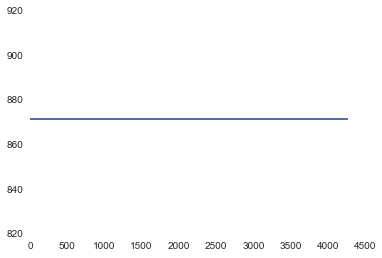

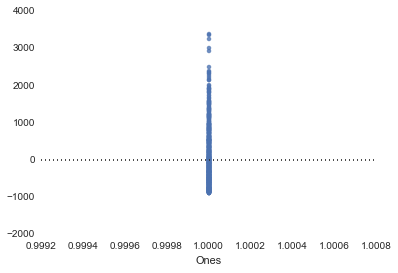

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   -0.7975
Date:                Sun, 26 Apr 2015   Prob (F-statistic):               1.00
Time:                        18:27:25   Log-Likelihood:                -5852.6
No. Observations:                 726   AIC:                         1.171e+04
Df Residuals:                     724   BIC:                         1.172e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    7.22e+15   7.14e+15      1.012      0.312     -6.79e+15  2.12e+16
Ones        -7.22e+15   7.14e+15     -1.012      0.312     -2.12e+16  6.79e+15
==============================================================================
Omnibus:                      155.341   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.850
Skew:                           1.264   Prob(JB):                     2.31e-62
Kurtosis:                       4.730   Cond. No.                     5.01e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.79e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
# Challenge 1: 
# Build a linear model that uses only a constant term 
# (a column of ones) to predict a continuous outcome 
# (like domestic total gross). How can you interpret the 
# results of this model? What does it predict? 
# Make a plot of predictions against actual outcome. 
# Make a histogram of residuals. How are the residuals distributed?

df['Ones'] = 1.0
df['Zeros'] = 0.0
# print df.head()
model1 = smf.ols(formula="DomesticTotalGross ~ Ones", data=df).fit()

plt.plot(df['DomesticTotalGross'].values, model1.predict())
plt.show()
#plt.ylim((0,2000))
#plt.xlim((0,2000))
seaborn.residplot(df['Ones'],df['DomesticTotalGross'].values)
plt.show()
model1.summary()

In [123]:
print len(df_subset)
print len(df['DomesticTotalGross'].values)

726
726


In [32]:
# Challenge 2:
# Repeat the process of challenge one, but also add one 
# continuous (numeric) predictor variable. 
# Also add plots of model prediction against your feature 
# variable and residuals against feature variable. 
# How can you interpret what's happening in the model?
df.sort(columns='DomesticTotalGross', ascending=True, inplace=True)
model2 = smf.ols(formula="DomesticTotalGross ~ Ones + NumMovies", data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     994.4
Date:                Sun, 26 Apr 2015   Prob (F-statistic):          5.02e-138
Time:                        18:34:06   Log-Likelihood:                -5538.4
No. Observations:                 726   AIC:                         1.108e+04
Df Residuals:                     724   BIC:                         1.109e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     40.6370     15.905      2.555      0.011         9.412    71.862
Ones          40.6370     15.905      2.555      0.011         9.412    71.862
NumMovies     44.5223      1.412     31.534      0.000        41.750    47.294
==============================================================================
Omnibus:                      171.796   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.745
Skew:                           1.241   Prob(JB):                     1.75e-89
Kurtosis:                       5.712   Cond. No.                     7.57e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.44e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

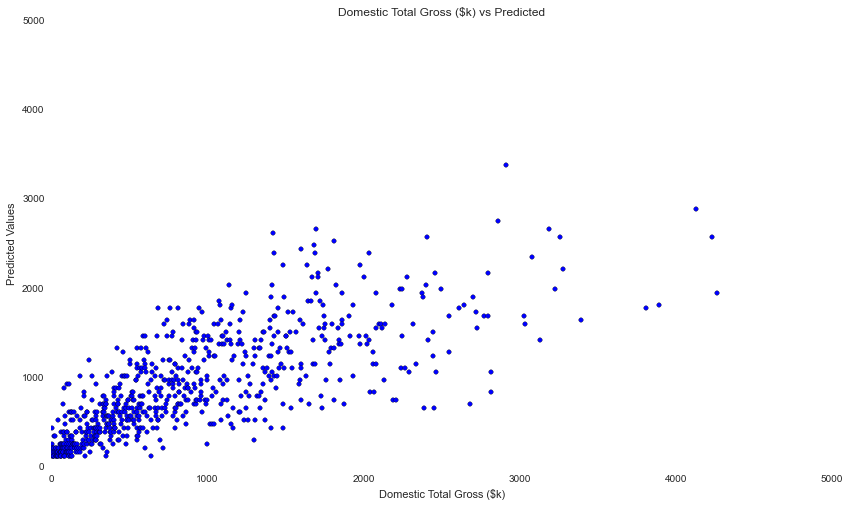

In [31]:
plt.scatter(df['DomesticTotalGross'].values, model2.predict())
plt.xlim(0, 5000)
plt.ylim(0, 5000)
title('Domestic Total Gross ($k) vs Predicted')
xlabel('Domestic Total Gross ($k)')
ylabel('Predicted Values')
sns.set_palette("deep", desat=.8)
sns.set_context(rc={"figure.figsize": (14, 8)})
plt.show()

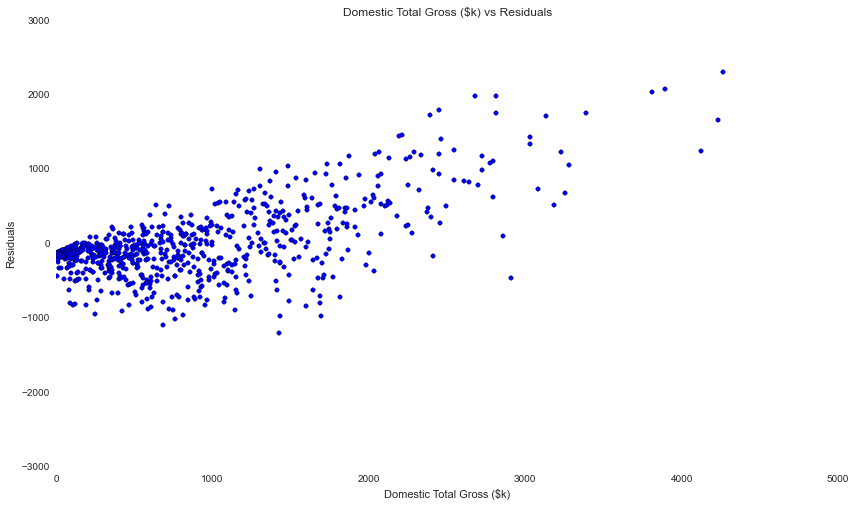

In [30]:
plt.scatter(df['DomesticTotalGross'].values, model2.resid)
plt.xlim(0, 5000)
plt.ylim(-3000, 3000)
title('Domestic Total Gross ($k) vs Residuals')
xlabel('Domestic Total Gross ($k)')
ylabel('Residuals')
sns.set_palette("deep", desat=.8)
sns.set_context(rc={"figure.figsize": (14, 8)})
plt.show()

In [33]:
# Challenge 3:
# Repeat the process of challenge 1, but add a categorical feature 
# (like genre). You'll have to convert a column of text into a number 
# of numerical columns ("dummy variables"). How can you interpret 
# what's happening in the model?

catlist = ['Cat1','Cat2','Cat3','Cat4','Cat5']
catvar = np.random.choice(catlist, size=len(df))
df['CatVar'] = catvar

model3 = smf.ols(formula="DomesticTotalGross ~ Ones + NumMovies + CatVar", data=df).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     198.8
Date:                Sun, 26 Apr 2015   Prob (F-statistic):          5.53e-133
Time:                        18:34:44   Log-Likelihood:                -5537.3
No. Observations:                 726   AIC:                         1.109e+04
Df Residuals:                     720   BIC:                         1.111e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         62.8862     23.759      2.647      0.008        16.241   109.531
CatVar[T.Cat2]   -49.5058     57.874     -0.855      0.393      -163.128    64.116
CatVar[T.Cat3]   -40.1954     56.700     -0.709      0.479      -151.512    71.121
CatVar[T.Cat4]   -54.9551     57.099     -0.962      0.336      -167.055    57.145
CatVar[T.Cat5]   -84.4842     58.784     -1.437      0.151      -199.893    30.925
Ones              62.8862     23.759      2.647      0.008        16.241   109.531
NumMovies         44.4994      1.414     31.460      0.000        41.722    47.276
==============================================================================
Omnibus:                      171.556   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.162
Skew:                           1.239   Prob(JB):                     2.34e-89
Kurtosis:                       5.711   Cond. No.                     8.01e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.76e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

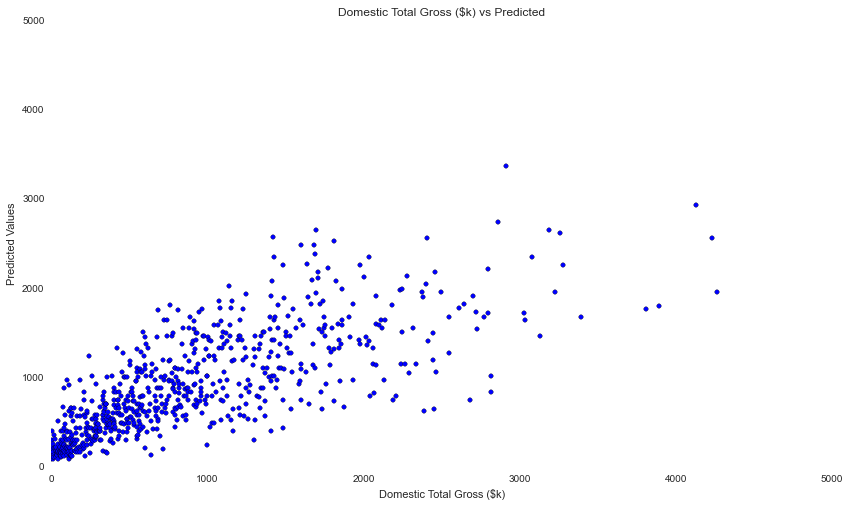

In [34]:
plt.scatter(df['DomesticTotalGross'].values, model3.predict())
plt.xlim(0, 5000)
plt.ylim(0, 5000)
title('Domestic Total Gross ($k) vs Predicted')
xlabel('Domestic Total Gross ($k)')
ylabel('Predicted Values')
sns.set_palette("deep", desat=.8)
sns.set_context(rc={"figure.figsize": (14, 8)})
plt.show()

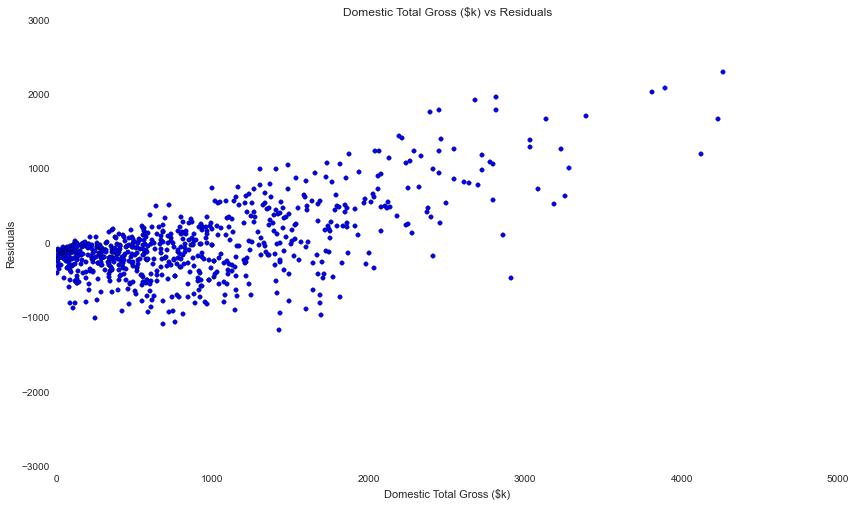

In [35]:
plt.scatter(df['DomesticTotalGross'].values, model3.resid)
plt.xlim(0, 5000)
plt.ylim(-3000, 3000)
title('Domestic Total Gross ($k) vs Residuals')
xlabel('Domestic Total Gross ($k)')
ylabel('Residuals')
sns.set_palette("deep", desat=.8)
sns.set_context(rc={"figure.figsize": (14, 8)})
plt.show()

In [36]:
# Challenge 4:
# Enhance your model further by adding more features and/or 
# transforming existing features. Think about how you build the 
# model matrix and how to interpret what the model is doing.

model4 = smf.ols(formula="DomesticTotalGross ~ Ones + NumMovies + CareerLength + CatVar", data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     166.1
Date:                Sun, 26 Apr 2015   Prob (F-statistic):          3.71e-132
Time:                        18:37:09   Log-Likelihood:                -5536.5
No. Observations:                 726   AIC:                         1.109e+04
Df Residuals:                     719   BIC:                         1.112e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         68.2246     24.122      2.828      0.005        20.867   115.582
CatVar[T.Cat2]   -49.5978     57.850     -0.857      0.392      -163.173    63.977
CatVar[T.Cat3]   -40.0469     56.676     -0.707      0.480      -151.318    71.224
CatVar[T.Cat4]   -55.7442     57.079     -0.977      0.329      -167.805    56.316
CatVar[T.Cat5]   -85.9817     58.772     -1.463      0.144      -201.366    29.403
Ones              68.2246     24.122      2.828      0.005        20.867   115.582
NumMovies         45.7089      1.707     26.772      0.000        42.357    49.061
CareerLength      -1.6994      1.345     -1.264      0.207        -4.339     0.941
==============================================================================
Omnibus:                      172.816   Durbin-Watson:                   1.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.140
Skew:                           1.242   Prob(JB):                     2.63e-91
Kurtosis:                       5.761   Cond. No.                     1.16e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.68e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
# Challenge 5: 
# Fitting and checking predictions on the exact same data set 
# can be misleading. Divide your data into two sets: a training 
# and a test set (roughly 75% training, 25% test is a fine split). 
# Fit a model on the training set, check the predictions (by plotting 
# versus actual values) in the test set.
train = df[msk]
test = df[~msk]
train.sort(columns='DomesticTotalGross', ascending=True, inplace=True)
test.sort(columns='DomesticTotalGross', ascending=True, inplace=True)

/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:2891: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=inplace, kind=kind, na_position=na_position)


In [41]:
model5 = smf.ols(formula="DomesticTotalGross ~ Ones + NumMovies + CareerLength + CatVar", data=train).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     116.2
Date:                Sun, 26 Apr 2015   Prob (F-statistic):           5.98e-93
Time:                        18:44:32   Log-Likelihood:                -4065.7
No. Observations:                 531   AIC:                             8145.
Df Residuals:                     524   BIC:                             8175.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         75.4295     29.381      2.567      0.011        17.710   133.149
CatVar[T.Cat2]   -59.8606     70.545     -0.849      0.397      -198.446    78.725
CatVar[T.Cat3]   -61.5983     67.802     -0.908      0.364      -194.796    71.599
CatVar[T.Cat4]   -70.5288     68.751     -1.026      0.305      -205.590    64.533
CatVar[T.Cat5]   -90.3684     71.937     -1.256      0.210      -231.688    50.951
Ones              75.4295     29.381      2.567      0.011        17.710   133.149
NumMovies         46.7013      2.138     21.840      0.000        42.501    50.902
CareerLength      -2.3034      1.691     -1.362      0.174        -5.625     1.018
==============================================================================
Omnibus:                      124.437   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.362
Skew:                           1.225   Prob(JB):                     1.32e-61
Kurtosis:                       5.582   Cond. No.                     2.12e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

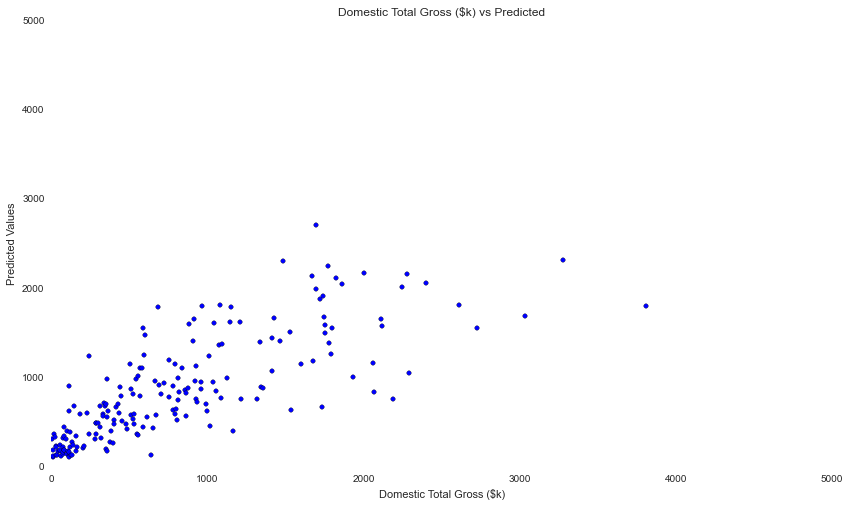

In [43]:
plt.scatter(test['DomesticTotalGross'].values, model5.predict(test))
plt.xlim(0, 5000)
plt.ylim(0, 5000)
title('Domestic Total Gross ($k) vs Predicted')
xlabel('Domestic Total Gross ($k)')
ylabel('Predicted Values')
sns.set_palette("deep", desat=.8)
sns.set_context(rc={"figure.figsize": (14, 8)})
plt.show()